## **Applied Big Data Analytics Assignment 2**
- Sai Rachana Kandika &
Aishitha Pachipala

#### **Loading Data**

In [ ]:
!pip install neo4j yfiles_jupyter_graphs_for_neo4j
!pip install pyspark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/DATS6450-Project2/2016q1.zip" -d "/content/drive/My Drive/DATS6450-Project2/2016q1/"
!unzip "/content/drive/My Drive/DATS6450-Project2/2016q2.zip" -d "/content/drive/My Drive/DATS6450-Project2/2016q2/"
!unzip "/content/drive/My Drive/DATS6450-Project2/2016q3.zip" -d "/content/drive/My Drive/DATS6450-Project2/2016q3/"
!unzip "/content/drive/My Drive/DATS6450-Project2/2016q4.zip" -d "/content/drive/My Drive/DATS6450-Project2/2016q4/"

unzip:  cannot find or open /content/drive/My Drive/DATS6450-Project2/2016q1.zip, /content/drive/My Drive/DATS6450-Project2/2016q1.zip.zip or /content/drive/My Drive/DATS6450-Project2/2016q1.zip.ZIP.
unzip:  cannot find or open /content/drive/My Drive/DATS6450-Project2/2016q2.zip, /content/drive/My Drive/DATS6450-Project2/2016q2.zip.zip or /content/drive/My Drive/DATS6450-Project2/2016q2.zip.ZIP.
unzip:  cannot find or open /content/drive/My Drive/DATS6450-Project2/2016q3.zip, /content/drive/My Drive/DATS6450-Project2/2016q3.zip.zip or /content/drive/My Drive/DATS6450-Project2/2016q3.zip.ZIP.
unzip:  cannot find or open /content/drive/My Drive/DATS6450-Project2/2016q4.zip, /content/drive/My Drive/DATS6450-Project2/2016q4.zip.zip or /content/drive/My Drive/DATS6450-Project2/2016q4.zip.ZIP.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DateType, FloatType

# Initializing Spark session
spark = SparkSession.builder \
    .appName("Loading Data") \
    .config("spark.driver.memory", "12g") \
    .config("spark.executor.memory", "12g") \
    .getOrCreate()

#### **Submission Data Set (SUB)**

In [ ]:
# Schema Definition
sub_schema = StructType([
    StructField("adsh", StringType(), nullable=False),
    StructField("cik", StringType(), nullable=False),
    StructField("name", StringType(), nullable=False),
    StructField("sic", StringType(), nullable=True),
    StructField("countryba", StringType(), nullable=True),
    StructField("stprba", StringType(), nullable=True),
    StructField("cityba", StringType(), nullable=True),
    StructField("zipba", StringType(), nullable=True),
    StructField("bas1", StringType(), nullable=True),
    StructField("bas2", StringType(), nullable=True),
    StructField("baph", StringType(), nullable=True),
    StructField("countryma", StringType(), nullable=True),
    StructField("stprma", StringType(), nullable=True),
    StructField("cityma", StringType(), nullable=True),
    StructField("zipma", StringType(), nullable=True),
    StructField("mas1", StringType(), nullable=True),
    StructField("mas2", StringType(), nullable=True),
    StructField("countryinc", StringType(), nullable=True),
    StructField("stprinc", StringType(), nullable=True),
    StructField("ein", StringType(), nullable=True),
    StructField("former", StringType(), nullable=True),
    StructField("changed", StringType(), nullable=True),
    StructField("afs", StringType(), nullable=True),
    StructField("wksi", StringType(), nullable=False),
    StructField("fye", StringType(), nullable=True),
    StructField("form", StringType(), nullable=False),
    StructField("period", StringType(), nullable=False),
    StructField("fy", StringType(), nullable=True),
    StructField("fp", StringType(), nullable=True),
    StructField("filed", StringType(), nullable=False),
    StructField("accepted", StringType(), nullable=False),
    StructField("prevrpt", StringType(), nullable=False),
    StructField("detail", StringType(), nullable=False),
    StructField("instance", StringType(), nullable=False),
    StructField("nciks", StringType(), nullable=False),
    StructField("aciks", StringType(), nullable=True)])

# Function to load data for a specific quarter
def load_sub_data(quarter):
    sub_df = spark.read.option("delimiter", "\t") \
        .schema(sub_schema) \
        .csv(f"/content/drive/Shareddrives/DATS6450-Project2/{quarter}/sub.txt")

    sub_df = sub_df.replace("", None)
    sub_df = sub_df.filter(sub_df.adsh != sub_df.first()[0])

    return sub_df

# Combinging all quarters into a single DataFrame
sub_data = (
    load_sub_data("2016q1")
    .union(load_sub_data("2016q2"))
    .union(load_sub_data("2016q3"))
    .union(load_sub_data("2016q4")))

sub_data.show(5)

+--------------------+-------+--------------------+----+---------+------+-------------------+----------+--------------------+--------------------+---------------+---------+------+-------------------+-------+--------------------+--------------------+----------+-------+---------+--------------------+--------+-----+----+----+------+--------+----+---+--------+--------------------+-------+------+-----------------+-----+-----+
|                adsh|    cik|                name| sic|countryba|stprba|             cityba|     zipba|                bas1|                bas2|           baph|countryma|stprma|             cityma|  zipma|                mas1|                mas2|countryinc|stprinc|      ein|              former| changed|  afs|wksi| fye|  form|  period|  fy| fp|   filed|            accepted|prevrpt|detail|         instance|nciks|aciks|
+--------------------+-------+--------------------+----+---------+------+-------------------+----------+--------------------+--------------------+----

In [ ]:
unique_cik_count = sub_data.select("cik").distinct().count()

print(f"Number of unique CIK values: {unique_cik_count}")

Number of unique CIK values: 7213


#### **Number Data Set (NUM)**

In [ ]:
# Defining Schema
num_schema = StructType([
    StructField("adsh", StringType(), nullable=False),
    StructField("tag", StringType(), nullable=False),
    StructField("version", StringType(), nullable=False),
    StructField("ddate", DateType(), nullable=False),
    StructField("qtrs", IntegerType(), nullable=False),
    StructField("uom", StringType(), nullable=False),
    StructField("segments", StringType(), nullable=True),
    StructField("coreg", StringType(), nullable=True),
    StructField("value", FloatType(), nullable=True),
    StructField("footnote", StringType(), nullable=True)
])

# Function to load data for a specific quarter
def load_num_data(quarter):
    num_df = spark.read.option("delimiter", "\t") \
        .schema(num_schema) \
        .csv(f"/content/drive/Shareddrives/DATS6450-Project2/{quarter}/num.txt")

    num_df = num_df.replace("", None)
    num_df = num_df.filter(num_df.adsh != num_df.first()[0])

    return num_df

# Combining all quarters into a single DataFrame
num_data = (
    load_num_data("2016q1")
    .union(load_num_data("2016q2"))
    .union(load_num_data("2016q3"))
    .union(load_num_data("2016q4")))

num_data.show(5)

+--------------------+--------------------+------------+-----+----+---+--------------------+-----+----------+--------+
|                adsh|                 tag|     version|ddate|qtrs|uom|            segments|coreg|     value|footnote|
+--------------------+--------------------+------------+-----+----+---+--------------------+-----+----------+--------+
|0000919574-16-012035|AccountsPayableCu...|us-gaap/2015| NULL|   0|USD|                NULL| NULL| 1807000.0|    NULL|
|0001477932-16-009072|AccumulatedDeprec...|us-gaap/2014| NULL|   0|USD|                NULL| NULL|   70484.0|    NULL|
|0001628280-16-010235|AccruedLiabilitie...|us-gaap/2015| NULL|   0|USD|                NULL| NULL|  4.8368E7|    NULL|
|0000919574-16-012194|DueToRelatedParti...|us-gaap/2015| NULL|   0|USD|RelatedPartyTrans...| NULL|       0.0|    NULL|
|0001140361-16-059398|       NetIncomeLoss|us-gaap/2015| NULL|   4|USD|PartnerCapitalCom...| NULL|-5438000.0|    NULL|
+--------------------+--------------------+-----

#### **Presentation Data Set (PRE)**

In [ ]:
# Defining Schema
pre_schema = StructType([
    StructField("adsh", StringType(), nullable=False),
    StructField("report", IntegerType(), nullable=False),
    StructField("line", IntegerType(), nullable=False),
    StructField("stmt", StringType(), nullable=False),
    StructField("inpth", StringType(), nullable=False),
    StructField("rfile", StringType(), nullable=False),
    StructField("tag", StringType(), nullable=False),
    StructField("version", StringType(), nullable=False),
    StructField("plabel", StringType(), nullable=False),
    StructField("negating", StringType(), nullable=False)
])

# Loading data for all quarters
def load_pre_data(quarter):
    pre_df = spark.read.option("delimiter", "\t") \
        .schema(pre_schema) \
        .csv(f"/content/drive/Shareddrives/DATS6450-Project2/{quarter}/pre.txt")

    pre_df = pre_df.replace("", None)
    pre_df = pre_df.filter(pre_df.adsh != pre_df.first()[0])
    return pre_df

# Combining all quarters into a single DataFrame
pre_data = (
    load_pre_data("2016q1")
    .union(load_pre_data("2016q2"))
    .union(load_pre_data("2016q3"))
    .union(load_pre_data("2016q4")))

pre_data.show(5)

+--------------------+------+----+----+-----+-----+--------------------+------------+--------------------+--------+
|                adsh|report|line|stmt|inpth|rfile|                 tag|     version|              plabel|negating|
+--------------------+------+----+----+-----+-----+--------------------+------------+--------------------+--------+
|0000002178-16-000064|     2|   3|  BS|    0|    H|CashAndCashEquiva...|us-gaap/2015|Cash and cash equ...|       0|
|0000002178-16-000064|     2|   4|  BS|    0|    H|AccountsReceivabl...|us-gaap/2015|Accounts receivab...|       0|
|0000002178-16-000064|     2|   5|  BS|    0|    H|EnergyRelatedInve...|us-gaap/2015|         Inventories|       0|
|0000002178-16-000064|     2|   6|  BS|    0|    H|EnergyMarketingCo...|us-gaap/2015|Fair value contracts|       0|
|0000002178-16-000064|     2|   7|  BS|    0|    H|IncomeTaxesReceiv...|us-gaap/2015|Income tax receiv...|       0|
+--------------------+------+----+----+-----+-----+--------------------+

#### **Tag Data Set (TAG)**

In [ ]:
# Define Schema
tag_schema = StructType([
    StructField("tag", StringType(), nullable=False),
    StructField("version", StringType(), nullable=False),
    StructField("custom", StringType(), nullable=False),
    StructField("abstract", StringType(), nullable=False),
    StructField("datatype", StringType(), nullable=True),
    StructField("iord", StringType(), nullable=False),
    StructField("crdr", StringType(), nullable=True),
    StructField("tlabel", StringType(), nullable=True),
    StructField("doc", StringType(), nullable=True)
])

# Loading data for all quarters
def load_tag_data(quarter):
    tag_df = spark.read.option("delimiter", "\t") \
        .schema(tag_schema) \
        .csv(f"/content/drive/Shareddrives/DATS6450-Project2/{quarter}/tag.txt")

    tag_df = tag_df.replace("", None)
    tag_df = tag_df.filter(tag_df.tag != tag_df.first()[0])
    return tag_df

# Combining all quarters into a single DataFrame
tag_data = (
    load_tag_data("2016q1")
    .union(load_tag_data("2016q2"))
    .union(load_tag_data("2016q3"))
    .union(load_tag_data("2016q4")))

tag_data.show(5)

+--------------------+------------+------+--------+--------+----+----+--------------------+--------------------+
|                 tag|     version|custom|abstract|datatype|iord|crdr|              tlabel|                 doc|
+--------------------+------------+------+--------+--------+----+----+--------------------+--------------------+
|AccountsPayableCu...|us-gaap/2014|     0|       0|monetary|   I|   C|Accounts Payable,...|Carrying value as...|
|AccountsPayableRe...|us-gaap/2014|     0|       0|monetary|   I|   C|Accounts Payable,...|Amount for accoun...|
|AccountsReceivabl...|us-gaap/2014|     0|       0|monetary|   I|   D|Accounts Receivab...|Amount, after all...|
|AccruedLiabilitie...|us-gaap/2014|     0|       0|monetary|   I|   C|Accrued Liabiliti...|Carrying value as...|
|AccumulatedDeprec...|us-gaap/2014|     0|       0|monetary|   I|   C|Accumulated Depre...|Amount of accumul...|
+--------------------+------------+------+--------+--------+----+----+--------------------+-----

#### **Cleaning Data**

In [ ]:
from pyspark.sql import functions as F

# Count of the total number of rows and columns in NUM data
total_rows = num_data.count()
total_columns = len(num_data.columns)

print(f"\nTotal shape of num_data DataFrame: ({total_rows}, {total_columns})")

# Count of null values in each column
null_counts = num_data.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in num_data.columns]).collect()

print("\nCount of null values in each column:")
for row in null_counts:
    print(row.asDict())


Total shape of num_data DataFrame: (10566354, 10)

Count of null values in each column:
{'adsh': 0, 'tag': 0, 'version': 0, 'ddate': 10566354, 'qtrs': 0, 'uom': 0, 'segments': 5992666, 'coreg': 9638807, 'value': 275727, 'footnote': 10545640}


In [ ]:
# Defining keywords for financial analysis
keywords = ["revenue", "income", "debt", "assets", "liabilities"]

# Filtering tags that contain any of the keywords
filtered_tags = num_data.filter(
    num_data.tag.rlike("|".join(keywords))
).select("tag").distinct()

filtered_tags.show(5, truncate=False)
filtered_tags.count()

+-------------------------------------------------------------------------------------------------------+
|tag                                                                                                    |
+-------------------------------------------------------------------------------------------------------+
|Totalnonoperatingincomeexpenses                                                                        |
|ExpirationOfIndebtedness1                                                                              |
|Othercomprehensiveincomereclassificationofdefinedbenefitplansnetgainslossesandpriorservicecostbeforetax|
|Businessacquisitionpurchasepriceallocationnettangibleassetsacquired1                                   |
|GainsLossesonsaleofassetsandothernet                                                                   |
+-------------------------------------------------------------------------------------------------------+
only showing top 5 rows



415

In [ ]:
# Count of number of relevant tags
filtered_tags_count = filtered_tags.count()
print(f"Number of relevant tags found: {filtered_tags_count}")

In [ ]:
num_data = num_data.select(
    "adsh", "tag", "version", "qtrs", "uom", "value")

num_data.show(5)

+--------------------+--------------------+------------+----+---+----------+
|                adsh|                 tag|     version|qtrs|uom|     value|
+--------------------+--------------------+------------+----+---+----------+
|0000919574-16-012035|AccountsPayableCu...|us-gaap/2015|   0|USD| 1807000.0|
|0001477932-16-009072|AccumulatedDeprec...|us-gaap/2014|   0|USD|   70484.0|
|0001628280-16-010235|AccruedLiabilitie...|us-gaap/2015|   0|USD|  4.8368E7|
|0000919574-16-012194|DueToRelatedParti...|us-gaap/2015|   0|USD|       0.0|
|0001140361-16-059398|       NetIncomeLoss|us-gaap/2015|   4|USD|-5438000.0|
+--------------------+--------------------+------------+----+---+----------+
only showing top 5 rows



In [ ]:
from pyspark.sql import functions as F

# Count of the total number of rows and columns of SUB data
total_rows = sub_data.count()
total_columns = len(sub_data.columns)

print(f"\nTotal shape of sub_data DataFrame: ({total_rows}, {total_columns})")

# Count of null values in each column
null_counts = sub_data.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in sub_data.columns]).collect()

print("\nCount of null values in each column:")
for row in null_counts:
    print(row.asDict())


Total shape of sub_data DataFrame: (26941, 36)

Count of null values in each column:
{'adsh': 0, 'cik': 0, 'name': 0, 'sic': 14, 'countryba': 65, 'stprba': 2019, 'cityba': 65, 'zipba': 85, 'bas1': 69, 'bas2': 15055, 'baph': 87, 'countryma': 288, 'stprma': 2142, 'cityma': 283, 'zipma': 292, 'mas1': 289, 'mas2': 15252, 'countryinc': 2389, 'stprinc': 3235, 'ein': 9, 'former': 12847, 'changed': 12847, 'afs': 9, 'wksi': 0, 'fye': 3, 'form': 0, 'period': 0, 'fy': 395, 'fp': 437, 'filed': 0, 'accepted': 0, 'prevrpt': 0, 'detail': 0, 'instance': 0, 'nciks': 0, 'aciks': 26452}


In [ ]:
sub_data = sub_data.select(
    "adsh", "cik", "name", "countryba", "stprba", "countryma", "stprma",
    "ein", "former", "changed", "afs", "fye", "form", "period", "fy",
    "fp", "filed", "nciks")

sub_data.show(5)

+--------------------+-------+--------------------+---------+------+---------+------+---------+--------------------+--------+-----+----+------+--------+----+---+--------+-----+
|                adsh|    cik|                name|countryba|stprba|countryma|stprma|      ein|              former| changed|  afs| fye|  form|  period|  fy| fp|   filed|nciks|
+--------------------+-------+--------------------+---------+------+---------+------+---------+--------------------+--------+-----+----+------+--------+----+---+--------+-----+
|0001527541-16-000246|1527541|WHEELER REAL ESTA...|       US|    VA|       US|    VA|452681082|                NULL|    NULL|2-ACC|1231|  10-K|20151231|2015| FY|20160310|    1|
|0001169264-16-000032|1169264|SYNIVERSE HOLDING...|       US|    FL|       US|    FL|300041666|TSI TELECOMMUNICA...|20020315|4-NON|1231|  10-K|20151231|2015| FY|20160329|    1|
|0000712534-16-000349| 712534|FIRST MERCHANTS CORP|       US|    IN|       US|    IN|351544218|                NULL

In [ ]:
from pyspark.sql import functions as F

# Count of the total number of rows and columns in TAG data
total_rows = tag_data.count()
total_columns = len(tag_data.columns)

print(f"\nTotal shape of tag_data DataFrame: ({total_rows}, {total_columns})")

# Count of null values in each column
null_counts = tag_data.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in tag_data.columns]).collect()

print("\nCount of null values in each column:")
for row in null_counts:
    print(row.asDict())


Total shape of tag_data DataFrame: (240220, 9)

Count of null values in each column:
{'tag': 0, 'version': 0, 'custom': 0, 'abstract': 0, 'datatype': 0, 'iord': 0, 'crdr': 23769, 'tlabel': 3, 'doc': 10716}


In [ ]:
tag_data = tag_data.select("tag", "version", "abstract", "iord", "crdr", "tlabel")

tag_data.show()

+--------------------+------------+--------+----+----+--------------------+
|                 tag|     version|abstract|iord|crdr|              tlabel|
+--------------------+------------+--------+----+----+--------------------+
|AccountsPayableCu...|us-gaap/2014|       0|   I|   C|Accounts Payable,...|
|AccountsPayableRe...|us-gaap/2014|       0|   I|   C|Accounts Payable,...|
|AccountsReceivabl...|us-gaap/2014|       0|   I|   D|Accounts Receivab...|
|AccruedLiabilitie...|us-gaap/2014|       0|   I|   C|Accrued Liabiliti...|
|AccumulatedDeprec...|us-gaap/2014|       0|   I|   C|Accumulated Depre...|
|AdditionalPaidInC...|us-gaap/2014|       0|   I|   C|Additional Paid i...|
|AllowanceForDoubt...|us-gaap/2014|       0|   I|   C|Accounts Receivab...|
|AssetRetirementOb...|us-gaap/2014|       0|   I|   C|Asset Retirement ...|
|              Assets|us-gaap/2014|       0|   I|   D|              Assets|
|       AssetsCurrent|us-gaap/2014|       0|   I|   D|     Assets, Current|
|AssetsOfDis

In [ ]:
from pyspark.sql import functions as F

# Count of the total number of rows and columns in PRE data
total_rows = pre_data.count()
total_columns = len(pre_data.columns)

print(f"\nTotal shape of pre_data DataFrame: ({total_rows}, {total_columns})")

# Count of the null values in each column
null_counts = pre_data.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in pre_data.columns]).collect()

print("\nCount of null values in each column:")
for row in null_counts:
    print(row.asDict())


Total shape of pre_data DataFrame: (2735245, 10)

Count of null values in each column:
{'adsh': 0, 'report': 0, 'line': 0, 'stmt': 0, 'inpth': 0, 'rfile': 0, 'tag': 0, 'version': 0, 'plabel': 660, 'negating': 0}


In [ ]:
pre_data = pre_data.select("adsh", "report", "line", "stmt", "inpth", "tag", "version", "plabel")

pre_data.show(5)

+--------------------+------+----+----+-----+--------------------+------------+--------------------+
|                adsh|report|line|stmt|inpth|                 tag|     version|              plabel|
+--------------------+------+----+----+-----+--------------------+------------+--------------------+
|0000002178-16-000064|     2|   3|  BS|    0|CashAndCashEquiva...|us-gaap/2015|Cash and cash equ...|
|0000002178-16-000064|     2|   4|  BS|    0|AccountsReceivabl...|us-gaap/2015|Accounts receivab...|
|0000002178-16-000064|     2|   5|  BS|    0|EnergyRelatedInve...|us-gaap/2015|         Inventories|
|0000002178-16-000064|     2|   6|  BS|    0|EnergyMarketingCo...|us-gaap/2015|Fair value contracts|
|0000002178-16-000064|     2|   7|  BS|    0|IncomeTaxesReceiv...|us-gaap/2015|Income tax receiv...|
+--------------------+------+----+----+-----+--------------------+------------+--------------------+
only showing top 5 rows



In [ ]:
sub_data_cleaned = sub_data.dropna()
num_data_cleaned = num_data.dropna()
tag_data_cleaned = tag_data.dropna()
pre_data_cleaned = pre_data.dropna()

num_data_cleaned.show(5)
tag_data_cleaned.show(5)
pre_data_cleaned.show(5)
sub_data_cleaned.show(5)

+--------------------+--------------------+------------+----+---+----------+
|                adsh|                 tag|     version|qtrs|uom|     value|
+--------------------+--------------------+------------+----+---+----------+
|0000919574-16-012035|AccountsPayableCu...|us-gaap/2015|   0|USD| 1807000.0|
|0001477932-16-009072|AccumulatedDeprec...|us-gaap/2014|   0|USD|   70484.0|
|0001628280-16-010235|AccruedLiabilitie...|us-gaap/2015|   0|USD|  4.8368E7|
|0000919574-16-012194|DueToRelatedParti...|us-gaap/2015|   0|USD|       0.0|
|0001140361-16-059398|       NetIncomeLoss|us-gaap/2015|   4|USD|-5438000.0|
+--------------------+--------------------+------------+----+---+----------+
only showing top 5 rows

+--------------------+------------+--------+----+----+--------------------+
|                 tag|     version|abstract|iord|crdr|              tlabel|
+--------------------+------------+--------+----+----+--------------------+
|AccountsPayableCu...|us-gaap/2014|       0|   I|   C|

In [ ]:
total_rows = sub_data.count()
total_columns = len(sub_data.columns)

print(f"\nTotal shape of sub_data DataFrame: ({total_rows}, {total_columns})")

total_rows = num_data.count()
total_columns = len(num_data.columns)

print(f"\nTotal shape of num_data DataFrame: ({total_rows}, {total_columns})")

total_rows = tag_data.count()
total_columns = len(tag_data.columns)

print(f"\nTotal shape of tag_data DataFrame: ({total_rows}, {total_columns})")

total_rows = pre_data.count()
total_columns = len(pre_data.columns)

print(f"\nTotal shape of num_data DataFrame: ({total_rows}, {total_columns})")


Total shape of sub_data DataFrame: (26941, 18)

Total shape of num_data DataFrame: (10566354, 6)

Total shape of tag_data DataFrame: (240220, 6)

Total shape of num_data DataFrame: (2735245, 8)


#### **Question 1 :** Analyze financial statements for companies. Financial Statement Comparison allows analysts and investors to compare financial statements of different companies, aiding in benchmarking and performance evaluation. At a minimum this should include revenue, income, debt, assets, and liabilities.




STEP 1: Join pre,sub and num data after filtering pre data with only appropriat statements

> Add blockquote



In [ ]:
# Filter PRE data for specific stmt values
stmt_values = ["BS", "IS", "CF", "EQ", "CI", "SI"]
filtered_pre_data = pre_data.filter(pre_data.stmt.isin(stmt_values))

# Join SUB and PRE on adsh
sub_pre_joined = sub_data.join(filtered_pre_data, on="adsh", how="inner")

# Join NUM and SUB and PRE on adsh, version, and tag
num_pre_joined = sub_pre_joined.join(num_data, on=["adsh", "version", "tag"], how="inner")

num_pre_joined = num_pre_joined.dropDuplicates()

num_pre_joined.show(5)
print(num_pre_joined.count())

+--------------------+------------+--------------------+----+--------------------+---------+------+---------+------+---------+--------------------+--------+-----+----+----+--------+----+---+--------+-----+------+----+----+-----+--------------------+----+------+---------+
|                adsh|     version|                 tag| cik|                name|countryba|stprba|countryma|stprma|      ein|              former| changed|  afs| fye|form|  period|  fy| fp|   filed|nciks|report|line|stmt|inpth|              plabel|qtrs|   uom|    value|
+--------------------+------------+--------------------+----+--------------------+---------+------+---------+------+---------+--------------------+--------+-----+----+----+--------+----+---+--------+-----+------+----+----+-----+--------------------+----+------+---------+
|0000002178-16-000064|us-gaap/2015|CommonStockShares...|2178|ADAMS RESOURCES &...|       US|    TX|       US|    TX|741753147|ADAMS RESOURCES &...|19920703|2-ACC|1231|10-K|20151231|201

STEP 2 :


*   We remove tags from the dataframe which are summed to value 0 to
    minimize the number of tags and rows.

*   Ensured tags with tags containing ["revenue","income", "assets",
    "debt", "liability"] are aggregated.
*   We would consider income,revenue,assests as Credit as they are
    recievable and debt,liabilities as Debit as they are payable.


*  Hence, in future if we have to sum up values of tags containing these
   values there would no problem.

Example : income and incometax would not be summed as they are belong to two different cerdit and debit categories and it would not be appropriate to sum them up even though they contain income in them

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType



num_pre_joined = num_pre_joined.withColumn("value", F.col("value").cast(FloatType()))
crdr_mapping = {row.tag: row.crdr for row in tag_data.select("tag", "crdr").collect()}

# Broadcast the dictionary to optimize access
crdr_broadcast = spark.sparkContext.broadcast(crdr_mapping)

# Define a UDF to map the crdr value
def get_crdr(tag):
    return crdr_broadcast.value.get(tag, None)

# Register the UDF
get_crdr_udf = F.udf(get_crdr)
num_pre_joined = num_pre_joined.withColumn("crdr", get_crdr_udf(F.col("tag")))

category_rules = {
    "revenue": "D",
    "income": "D",
    "assets": "D",
    "debt": "C",
    "liability": "C"
}

agg_exprs = [
    F.sum(F.when(F.col("crdr") == crdr_value, F.col("value")).otherwise(0)).alias(category)
    for category, crdr_value in category_rules.items()
]

tag_sums = num_pre_joined.groupBy("tag").agg(*agg_exprs)

zero_sum_tags = tag_sums.filter(
    F.greatest(*[F.col(category) for category in category_rules.keys()]) == 0
).select("tag")

zero_sum_tag_list = [row.tag for row in zero_sum_tags.collect()]

num_pre_joined = num_pre_joined.filter(~F.col("tag").isin(zero_sum_tag_list))


STEP 3: Create graph with companies as nodes having properties such as name,tag,fp,stmt,fye and value to further analyse. This graph is represented by batch id as main_graph

In [ ]:
from neo4j import GraphDatabase
from pyspark.sql import functions as F

# Neo4j Connection
NEO4J_URI = "neo4j+s://22e0ea28.databases.neo4j.io"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "7L6AUSP97VOZFcl5dEeSIFCwacdVwgttCA5ZPsm3UgQ"

def load_company_nodes(df,batch_id):
    """
    Loads unique `cik` values as nodes and merges selected financial properties.
    - `name`, `tag`, `fp`, `stmt`, and `fye` are collected as sets.
    - `value` is summed for each `cik`.
    """

    # Aggregate specified properties and sum `value` for each `cik`
    df_grouped = df.groupBy("cik").agg(
        F.collect_set("name").alias("names"),  # Collect unique names
        F.collect_set("tag").alias("tags"),    # Collect unique tags
        F.collect_set("fp").alias("fps"),      # Collect unique fp values
        F.collect_set("stmt").alias("stmts"),   # Collect unique stmt values
        F.collect_set("fye").alias("fyes"),     # Collect unique fye values
        F.sum("value").alias("total_value")     # Sum of values
    )

    def process_partition(partition):
        driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
        try:
            with driver.session() as session:
                for row in partition:
                    query = """
                    MERGE (c:Company {cik: $cik})
                    SET c.names = $names,
                        c.tags = $tags,
                        c.fps = $fps,
                        c.stmts = $stmts,
                        c.fyes = $fyes,
                        c.total_value = $total_value
                    """
                    session.run(query,
                                cik=row["cik"],
                                names=list(row["names"]),   # Convert collected set to list
                                tags=list(row["tags"]),
                                fps=list(row["fps"]),
                                stmts=list(row["stmts"]),
                                fyes=list(row["fyes"]),
                                total_value=row["total_value"])
        finally:
            driver.close()

    df_grouped.foreachPartition(process_partition)

# Load data from num_pre_joined
load_company_nodes(num_pre_joined, batch_id='main_graph')



Step 4: Extract data from created graph and create tag nodes along with company nodes to check and visualise relationship between overall companies sum for revenue,asset,income,debt and income

In [ ]:
from neo4j import GraphDatabase
import pandas as pd
from yfiles_jupyter_graphs_for_neo4j import Neo4jGraphWidget
import uuid

# Neo4j Connection
NEO4J_URI = "neo4j+s://22e0ea28.databases.neo4j.io"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "7L6AUSP97VOZFcl5dEeSIFCwacdVwgttCA5ZPsm3UgQ"

def fetch_grouped_data():
    driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
    query = """
    MATCH (c:Company)
    WITH c.cik AS cik, c.names AS names, c.tags AS tags, c.fps AS fps, c.total_value AS total_value
    UNWIND names AS name
    UNWIND tags AS tag
    UNWIND fps AS fp
    // Categorize tags based on keywords
    WITH
        cik,
        name,
        CASE
            WHEN toLower(tag) CONTAINS 'revenue' THEN 'Revenue'
            WHEN toLower(tag) CONTAINS 'income' THEN 'Income'
            WHEN toLower(tag) CONTAINS 'debt' THEN 'Debt'
            WHEN toLower(tag) CONTAINS 'assets' THEN 'Assets'
            WHEN toLower(tag) CONTAINS 'liabilities' THEN 'Liabilities'
            ELSE 'Other'  // Handle tags that don't match any condition
        END AS tag_category,
        fp,
        total_value
    // Group by cik, name, tag_category, and fp, and sum total_value
    RETURN
        cik,
        name,
        tag_category,
        fp,
        SUM(total_value) AS total_value
    ORDER BY cik, name, tag_category, fp
    """

    with driver.session() as session:
        result = session.run(query)
        output_data = [record.data() for record in result]

    driver.close()
    return output_data

# Fetch grouped data
grouped_data = fetch_grouped_data()

# Create a DataFrame from the fetched data
df_grouped_data = pd.DataFrame(grouped_data)

print(df_grouped_data)

total_rows = len(df_grouped_data)
total_columns = len(df_grouped_data.columns)
print(f"\nTotal shape of grouped data: ({total_rows}, {total_columns})")

# Define the categories you want to slice
categories = ["Revenue", "Debt", "Assets", "Liabilities", "Income"]  # Specified categories

# Create a list to hold the filtered rows
filtered_rows = []

# Loop through each category and get 20 rows for each
for category in categories:
    category_rows = df_grouped_data[df_grouped_data['tag_category'] == category].head(20)
    filtered_rows.append(category_rows)

# Concatenate all the filtered rows into a single DataFrame
filtered_df = pd.concat(filtered_rows)

print(filtered_df)

# Generate a unique batch ID
batch_id = str(uuid.uuid4())
print(batch_id)

# Function to delete all nodes and relationships in Neo4j
def delete_all_data():
    driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
    with driver.session() as session:
        session.run("MATCH (n) DETACH DELETE n")
    driver.close()

# Function to write the filtered data to Neo4j
def write_filtered_data_to_neo4j(df, batch_id):
    driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
    with driver.session() as session:
        for index, row in df.iterrows():
            query = """
            MERGE (c:Company {cik: $cik, name: $name})
            MERGE (t:Tag {name: $tag_category})
            MERGE (c)-[r:HAS]->(t)
            SET r.fp = $fp, r.total_value = $total_value, r.batch_id = $batch_id
            """
            # Set specific relationships based on the tag category
            if row['tag_category'] == "Income":
                session.run(query.replace("HAS", "HAS_INCOME"),
                            cik=row["cik"], name=row["name"], tag_category=row["tag_category"],
                            fp=row["fp"], total_value=row["total_value"], batch_id=batch_id)
            elif row['tag_category'] == "Revenue":
                session.run(query.replace("HAS", "HAS_REVENUE"),
                            cik=row["cik"], name=row["name"], tag_category=row["tag_category"],
                            fp=row["fp"], total_value=row["total_value"], batch_id=batch_id)
            elif row['tag_category'] == "Debt":
                session.run(query.replace("HAS", "HAS_DEBT"),
                            cik=row["cik"], name=row["name"], tag_category=row["tag_category"],
                            fp=row["fp"], total_value=row["total_value"], batch_id=batch_id)
            elif row['tag_category'] == "Assets":
                session.run(query.replace("HAS", "HAS_ASSETS"),
                            cik=row["cik"], name=row["name"], tag_category=row["tag_category"],
                            fp=row["fp"], total_value=row["total_value"], batch_id=batch_id)
            elif row['tag_category'] == "Liabilities":
                session.run(query.replace("HAS", "HAS_LIABILITIES"),
                            cik=row["cik"], name=row["name"], tag_category=row["tag_category"],
                            fp=row["fp"], total_value=row["total_value"], batch_id=batch_id)
    driver.close()

# Step 1: Delete all existing data in Neo4j
delete_all_data()

# Step 2: Write the filtered data to Neo4j
write_filtered_data_to_neo4j(filtered_df, batch_id)

# Step 3: Visualize the graph
def show_graph(batch_id):
    driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
    g = Neo4jGraphWidget(driver)
    query = """
    MATCH (c:Company)-[r]->(t:Tag)
    WHERE r.batch_id = $batch_id
    RETURN c, r, t
    LIMIT 100  // Limit to 100 results for visualization
    """
    g.show_cypher(query, parameters={"batch_id": batch_id})  # Pass batch_id as a parameter
    driver.close()

# Visualize the graph
show_graph(batch_id)


            cik                    name tag_category  fp   total_value
0       1000045  NICHOLAS FINANCIAL INC       Assets  FY  1.868280e+12
1       1000045  NICHOLAS FINANCIAL INC       Assets  Q1  1.868280e+12
2       1000045  NICHOLAS FINANCIAL INC       Assets  Q2  1.868280e+12
3       1000045  NICHOLAS FINANCIAL INC       Assets  Q3  1.868280e+12
4       1000045  NICHOLAS FINANCIAL INC         Debt  FY  2.668971e+11
...         ...                     ...          ...  ..           ...
150002     9984        BARNES GROUP INC        Other  Q3  1.008689e+13
150003     9984        BARNES GROUP INC      Revenue  FY  3.879575e+11
150004     9984        BARNES GROUP INC      Revenue  Q1  3.879575e+11
150005     9984        BARNES GROUP INC      Revenue  Q2  3.879575e+11
150006     9984        BARNES GROUP INC      Revenue  Q3  3.879575e+11

[150007 rows x 5 columns]

Total shape of grouped data: (150007, 5)
         cik                          name tag_category  fp   total_value
20   

GraphWidget(layout=Layout(height='620px', width='100%'))

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Step 5:
For analysis for every company, groupby company, tag category and quarter and display on stacked bar plot to check relative difference between different tag categories

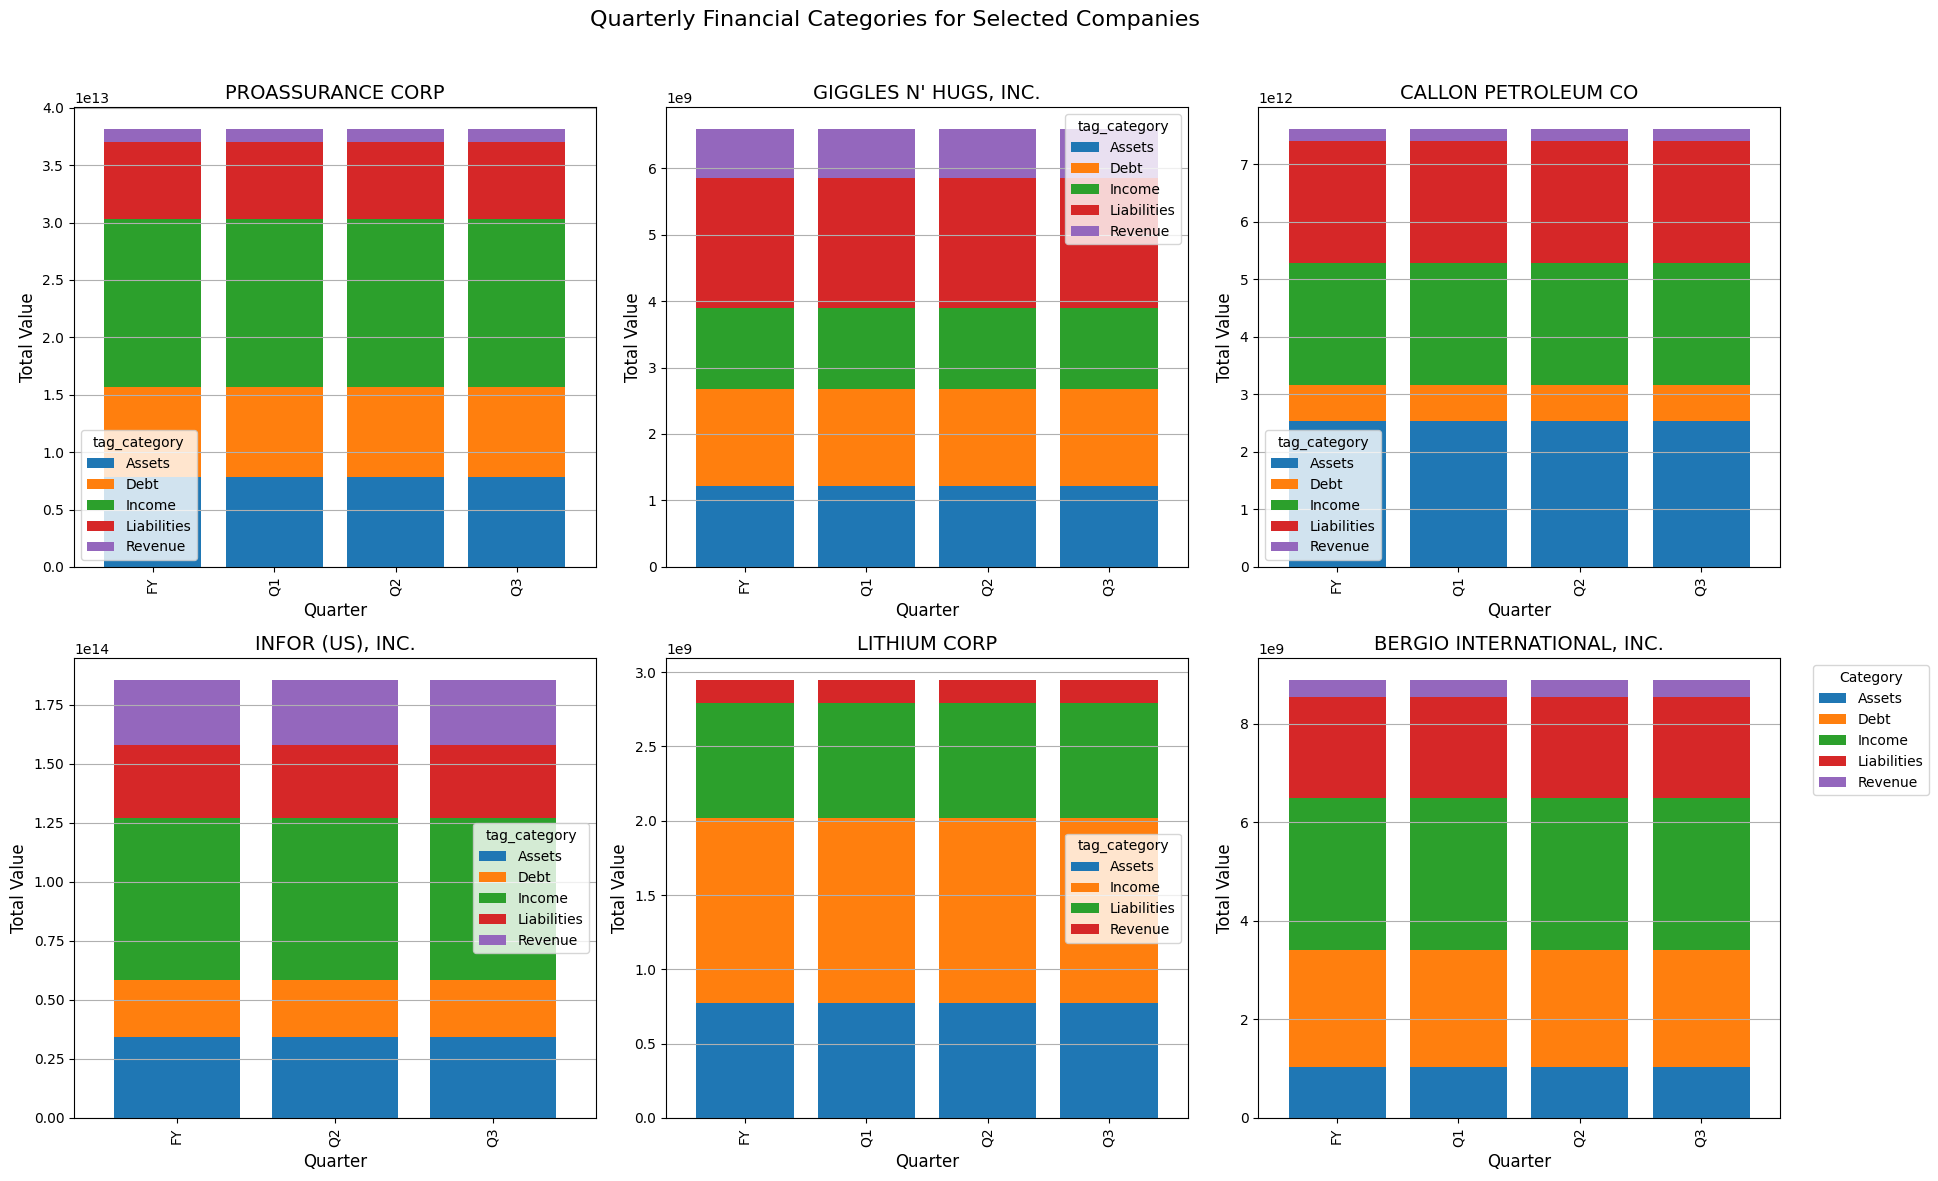

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)  # For reproducibility

# Get unique company names and randomly select 6
df_grouped_data = df_grouped_data[df_grouped_data['tag_category'] != 'Other']
random_companies = df_grouped_data['name'].unique()
selected_companies = np.random.choice(random_companies, size=6, replace=False)

# Filter the DataFrame for the selected companies
filtered_data = df_grouped_data[df_grouped_data['name'].isin(selected_companies)]

# Group data by quarter and category for plotting
grouped_data = filtered_data.groupby(['fp', 'tag_category', 'name']).sum().reset_index()

# Pivot table for stacking bars
pivot_data = grouped_data.pivot_table(index='fp', columns=['tag_category', 'name'], values='total_value', fill_value=0)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plotting each company's data
for i, company in enumerate(selected_companies):
    # Filter data for the current company
    company_data = grouped_data[grouped_data['name'] == company]

    # Pivot table for the current company's data
    company_pivot = company_data.pivot(index='fp', columns='tag_category', values='total_value').fillna(0)

    # Plot stacked bar for the current company
    company_pivot.plot(kind='bar', stacked=True, ax=axs[i], width=0.8)

    # Set titles and labels for each subplot
    axs[i].set_title(f'{company}', fontsize=14)
    axs[i].set_xlabel('Quarter', fontsize=12)
    axs[i].set_ylabel('Total Value', fontsize=12)
    axs[i].grid(axis='y')

# Adjust layout
plt.suptitle('Quarterly Financial Categories for Selected Companies', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the main title
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The Financial Statements of 6 sampled companies are vizualised above for comparison. From the vizualisations, we can observe that 'Giggles n hugs' has high liabilties and debt than the rest and 'Lithium Corp' has no debt.

#### **Question 2 :** Cluster companies based on financial health. Financial health is a function of revenue and debt, i.e. a health company will have high revenue and low debt.


In [ ]:
# Filtering only 'Debt' and 'Revenue' categories
filtered_data = df_grouped_data[df_grouped_data["tag_category"].isin(["Debt", "Revenue"])]

# Displaying the filtered data
print(filtered_data)

            cik                    name tag_category  fp   total_value
4       1000045  NICHOLAS FINANCIAL INC         Debt  FY  2.668971e+11
5       1000045  NICHOLAS FINANCIAL INC         Debt  Q1  2.668971e+11
6       1000045  NICHOLAS FINANCIAL INC         Debt  Q2  2.668971e+11
7       1000045  NICHOLAS FINANCIAL INC         Debt  Q3  2.668971e+11
20      1000045  NICHOLAS FINANCIAL INC      Revenue  FY  5.337942e+11
...         ...                     ...          ...  ..           ...
149990     9984        BARNES GROUP INC         Debt  Q3  1.357851e+12
150003     9984        BARNES GROUP INC      Revenue  FY  3.879575e+11
150004     9984        BARNES GROUP INC      Revenue  Q1  3.879575e+11
150005     9984        BARNES GROUP INC      Revenue  Q2  3.879575e+11
150006     9984        BARNES GROUP INC      Revenue  Q3  3.879575e+11

[45355 rows x 5 columns]


In [ ]:
from pyspark.sql.functions import col, sum

# Converting to PySpark DataFrame
df_spark = spark.createDataFrame(filtered_data)

# Filtering only 'Debt' and 'Revenue' categories
# filtered_df = df_spark.filter(df_spark["tag_category"].isin("Debt", "Revenue"))

# Pivoting the data
pivot_df = df_spark.groupBy("cik", "name") \
    .pivot("tag_category") \
    .agg(sum("total_value").alias("total_value"))

pivot_df.show()

+-------+--------------------+------------------+------------------+
|    cik|                name|              Debt|           Revenue|
+-------+--------------------+------------------+------------------+
|1335105|LIXTE BIOTECHNOLO...|        7.193083E9|        7.193083E9|
|1501134|        INVITAE CORP|  2.45525613696E11|  1.63683742464E11|
|1290677|TURNING POINT BRA...|     9.42581952E11|     1.57096992E11|
|1196501|   HMS HOLDINGS CORP| 1.441221342976E12|  7.20610671488E11|
|1344376|AEGEAN MARINE PET...|  1.31927189328E12|   1.0993932444E12|
|1430602|SCRIPPS NETWORKS ...| 3.518499303008E13|4.9258990242112E13|
|1409446|     NATE'S FOOD CO.|      1.42322268E9|       5.1753552E8|
|1445815|U.S. RARE EARTH M...|      5.06407704E8|      1.68802568E8|
|1302084|ENERGIZER RESOURC...|              NULL|     1.479475344E9|
|1017655|            PAID INC|      2.56563096E9|      5.13126192E9|
|1170991|DCT INDUSTRIAL TR...|2.5821003992448E13|1.2910501996224E13|
|1269879|DEWMAR INTERNATIO...|    

In [ ]:
from pyspark.sql.functions import col, sum
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.sql import functions as F

quartiles = pivot_df.approxQuantile(["Revenue", "Debt"], [0.25, 0.75], 0.05)

# Extract Q1 and Q3 for Revenue and Debt
Q1_revenue = quartiles[0][0]
Q3_revenue = quartiles[1][0]
Q1_debt = quartiles[0][1]
Q3_debt = quartiles[1][1]

# Calculate IQR for Revenue and Debt
IQR_revenue = Q3_revenue - Q1_revenue
IQR_debt = Q3_debt - Q1_debt

# Define lower and upper bounds for outliers
lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue
lower_bound_debt = Q1_debt - 1.5 * IQR_debt
upper_bound_debt = Q3_debt + 1.5 * IQR_debt

# Filter out outliers
pivot_df = pivot_df.filter(
    (F.col("Revenue") >= lower_bound_revenue) &
    (F.col("Revenue") <= upper_bound_revenue) &
    (F.col("Debt") >= lower_bound_debt) &
    (F.col("Debt") <= upper_bound_debt))

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=["Revenue", "Debt"], outputCol="features", handleInvalid="skip")
df_features = assembler.transform(pivot_df)

# Normalize features for better clustering
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(df_features)
df_scaled = scaler_model.transform(df_features)

# Apply KMeans clustering
kmeans = KMeans(k=4, seed=42, featuresCol="scaled_features", predictionCol="cluster")
model = kmeans.fit(df_scaled)
df_clustered = model.transform(df_scaled)

df_clustered.show()

+-------+--------------------+----------------+------------------+--------------------+--------------------+-------+
|    cik|                name|            Debt|           Revenue|            features|     scaled_features|cluster|
+-------+--------------------+----------------+------------------+--------------------+--------------------+-------+
|1335105|LIXTE BIOTECHNOLO...|      7.193083E9|        7.193083E9|[7.193083E9,7.193...|[0.38529141163125...|      0|
|1409446|     NATE'S FOOD CO.|    1.42322268E9|       5.1753552E8|[5.1753552E8,1.42...|[0.02772135273152...|      0|
|1445815|U.S. RARE EARTH M...|    5.06407704E8|      1.68802568E8|[1.68802568E8,5.0...|[0.00904176689073...|      0|
|1017655|            PAID INC|    2.56563096E9|      5.13126192E9|[5.13126192E9,2.5...|[0.27485170803763...|      0|
|1269879|DEWMAR INTERNATIO...|    -4.6619256E8|     -1.86477024E8|[-1.86477024E8,-4...|[-0.0099884841887...|      0|
|1353499|      MAX SOUND CORP| 3.3486019476E10|     2.391858534E

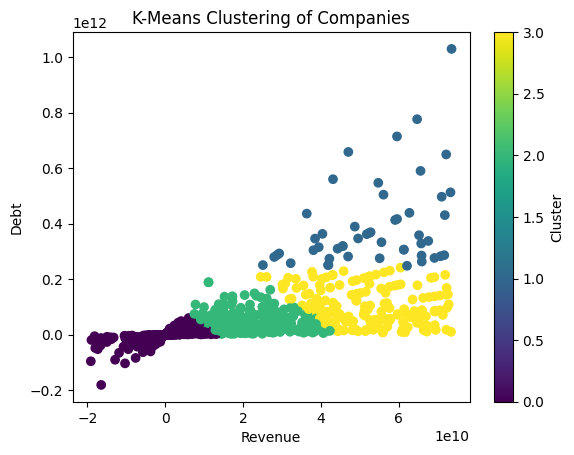

In [ ]:
import matplotlib.pyplot as plt

pandas_df = df_clustered.select("Revenue", "Debt", "cluster").toPandas()
plt.scatter(pandas_df["Revenue"], pandas_df["Debt"], c=pandas_df["cluster"], cmap="viridis")
plt.xlabel("Revenue")
plt.ylabel("Debt")
plt.title("K-Means Clustering of Companies")
plt.colorbar(label="Cluster")
plt.show()

**Question 3:** Identify unusual reporting patterns or significant deviations from historical data, which may indicate potential fraud or misrepresentation.


To identify anoalies which are often detected when there is a sudden deviation in reporting patterns compared to the company’s historical data such as a sudden shoot up and down in income and debt can be potentially fraudulent reporting or misrepresentation. Hence we took 'filetred_data' dataframe which consists of relevant attributes.

In [ ]:
filtered_data.head()

,cik,name,tag_category,fp,total_value
4,1000045,NICHOLAS FINANCIAL INC,Debt,FY,2.668971e+11
5,1000045,NICHOLAS FINANCIAL INC,Debt,Q1,2.668971e+11
6,1000045,NICHOLAS FINANCIAL INC,Debt,Q2,2.668971e+11
7,1000045,NICHOLAS FINANCIAL INC,Debt,Q3,2.668971e+11
20,1000045,NICHOLAS FINANCIAL INC,Revenue,FY,5.337942e+11


Check the unique quarters in the dataframe

In [ ]:
# Check unique values for 'fp'
unique_fp_values = filtered_data['fp'].unique()
print("Unique 'fp' values:")
print(unique_fp_values)
# Count of unique values
filtered_data['fp'].value_counts()

Unique 'fp' values:
['FY' 'Q1' 'Q2' 'Q3']


,count
fp,
FY,11728
Q1,11265
Q3,11184
Q2,11178


Step 3 : According to the unique values of fp it seems that H1,H2,CY and Q4 are wrongly coded. Hence, lets map them to appropriate quarter labels





In [ ]:
# Create a dictionary for conversion (mapping the old fp values to new ones)
fp_conversion = {
    'H1': 'Q1',
    'H2': 'Q2',
    'CY': 'FY',
    'Q4': 'FY'}

# Apply conversion to the 'fp' column
filtered_data['fp'] = filtered_data['fp'].replace(fp_conversion)

<ipython-input-69-cedb4cd57610>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['fp'] = filtered_data['fp'].replace(fp_conversion)


Step 4: Caluclate the revenue and debt change from previous quarter to check if there is any unusual increase or decrease with a threshold of 50 percent. It change is greater than 50 percent.

In [ ]:
import pandas as pd

def detect_financial_fraud(filtered_data):
    # Ensure data is sorted correctly by quarter
    quarter_order = {"Q1": 1, "Q2": 2, "Q3": 3, "FY": 4}
    filtered_data["fp_order"] = filtered_data["fp"].map(quarter_order)

    # Filter for Revenue and Debt data
    revenue_debt = filtered_data[filtered_data["tag_category"].isin(["Revenue", "Debt"])]

    # Pivot data to get revenue and debt side by side
    pivot_data = revenue_debt.pivot_table(index=["cik", "name", "fp"], columns="tag_category", values="total_value")

    # Calculate percentage change
    pivot_data["revenue_change"] = pivot_data["Revenue"].pct_change() * 100
    pivot_data["debt_change"] = pivot_data["Debt"].pct_change() * 100

    # Create a new column 'c' combining revenue_change and debt_change
    pivot_data['c'] = pivot_data[['revenue_change', 'debt_change']].apply(lambda x: f"{x['revenue_change']:.2f}%, {x['debt_change']:.2f}%", axis=1)

    # Return the complete list with changes
    return pivot_data.reset_index()[["cik", "name", "fp", "revenue_change", "debt_change", "c"]]

# Run fraud detection
fraud_companies = detect_financial_fraud(filtered_data)

# Show flagged companies
print(fraud_companies)
import pandas as pd

def detect_financial_fraud(filtered_data):
    # Ensure data is sorted correctly by quarter
    quarter_order = {"Q1": 1, "Q2": 2, "Q3": 3, "FY": 4}
    filtered_data["fp_order"] = filtered_data["fp"].map(quarter_order)

    # Filter for Revenue and Debt data
    revenue_debt = filtered_data[filtered_data["tag_category"].isin(["Revenue", "Debt"])]

    # Pivot data to get revenue and debt side by side
    pivot_data = revenue_debt.pivot_table(index=["cik", "name", "fp"], columns="tag_category", values="total_value")

    # Calculate percentage change
    pivot_data["revenue_change"] = pivot_data["Revenue"].pct_change() * 100
    pivot_data["debt_change"] = pivot_data["Debt"].pct_change() * 100

    pivot_data = pivot_data.dropna(subset=["revenue_change", "debt_change"])

    # Create a new column 'c' combining revenue_change and debt_change
    pivot_data['c'] = pivot_data[['revenue_change', 'debt_change']].apply(lambda x: f"{x['revenue_change']:.2f}%, {x['debt_change']:.2f}%", axis=1)

    # Return the complete list with changes
    return pivot_data.reset_index()[["cik", "name", "fp", "revenue_change", "debt_change", "c"]]

# Run fraud detection
fraud_companies = detect_financial_fraud(filtered_data)
fraud_companies.dropna(how = 'any')
# Show flagged companies
print(fraud_companies)


<ipython-input-100-bdec822feefa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["fp_order"] = filtered_data["fp"].map(quarter_order)
<ipython-input-100-bdec822feefa>:15: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pivot_data["revenue_change"] = pivot_data["Revenue"].pct_change() * 100
<ipython-input-100-bdec822feefa>:16: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=No

tag_category      cik                         name  fp  revenue_change  \
0             1000045       NICHOLAS FINANCIAL INC  FY             NaN   
1             1000045       NICHOLAS FINANCIAL INC  Q1        0.000000   
2             1000045       NICHOLAS FINANCIAL INC  Q2        0.000000   
3             1000045       NICHOLAS FINANCIAL INC  Q3        0.000000   
4             1000177  NORDIC AMERICAN TANKERS LTD  FY      -68.580813   
...               ...                          ...  ..             ...   
25308           99780       TRINITY INDUSTRIES INC  Q3        0.000000   
25309            9984             BARNES GROUP INC  FY      -82.664278   
25310            9984             BARNES GROUP INC  Q1        0.000000   
25311            9984             BARNES GROUP INC  Q2        0.000000   
25312            9984             BARNES GROUP INC  Q3        0.000000   

tag_category  debt_change                 c  
0                     NaN        nan%, nan%  
1                0.

<ipython-input-100-bdec822feefa>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["fp_order"] = filtered_data["fp"].map(quarter_order)
<ipython-input-100-bdec822feefa>:43: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pivot_data["revenue_change"] = pivot_data["Revenue"].pct_change() * 100
<ipython-input-100-bdec822feefa>:44: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=N

tag_category      cik                         name  fp  revenue_change  \
0             1000045       NICHOLAS FINANCIAL INC  Q1        0.000000   
1             1000045       NICHOLAS FINANCIAL INC  Q2        0.000000   
2             1000045       NICHOLAS FINANCIAL INC  Q3        0.000000   
3             1000177  NORDIC AMERICAN TANKERS LTD  FY      -68.580813   
4             1000180                 SANDISK CORP  FY     2273.855039   
...               ...                          ...  ..             ...   
25305           99780       TRINITY INDUSTRIES INC  Q3        0.000000   
25306            9984             BARNES GROUP INC  FY      -82.664278   
25307            9984             BARNES GROUP INC  Q1        0.000000   
25308            9984             BARNES GROUP INC  Q2        0.000000   
25309            9984             BARNES GROUP INC  Q3        0.000000   

tag_category  debt_change                   c  
0                0.000000        0.00%, 0.00%  
1              

Step 5: Create graph using the same logic for fraud detection and insert fraud relationship for the company if fraud detected and visualise for results

In [ ]:
import pandas as pd
from neo4j import GraphDatabase
import uuid
from yfiles_jupyter_graphs_for_neo4j import Neo4jGraphWidget

# Neo4j Connection
NEO4J_URI = "neo4j+s://22e0ea28.databases.neo4j.io"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "7L6AUSP97VOZFcl5dEeSIFCwacdVwgttCA5ZPsm3UgQ"

# Function to delete all nodes and relationships
def delete_all_data():
    driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
    with driver.session() as session:
        session.run("MATCH (n) DETACH DELETE n")
    driver.close()

# Function to insert flagged fraud data into Neo4j with distinction between fraud and normal
def write_fraud_data_to_neo4j(fraud_df, batch_id):
    if fraud_df.empty:
        print("No fraud data to insert into Neo4j.")
        return

    driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
    with driver.session() as session:
        for _, row in fraud_df.iterrows():
            # Create Company and Quarter nodes
            session.run("""
            MERGE (c:Company {cik: $cik, name: $name})
            MERGE (q:Quarter {fp: $fp})
            SET q.label = $fp
            SET q.revenue_change = $revenue_change
            SET q.debt_change = $debt_change
            """, cik=row["cik"], name=row["name"], fp=row["fp"], revenue_change=row["revenue_change"], debt_change=row["debt_change"])

            # Create the relationship (fraud or normal)
            if abs(row["debt_change"]) > 50 or abs(row["revenue_change"]) > 50:
                session.run("""
                MERGE (c:Company {cik: $cik, name: $name})
                MERGE (q:Quarter {fp: $fp})
                MERGE (c)-[:FLAGGED_FOR_FRAUD]->(q)
                """, cik=row["cik"], name=row["name"], fp=row["fp"])
            else:
                session.run("""
                MERGE (c:Company {cik: $cik, name: $name})
                MERGE (q:Quarter {fp: $fp})
                MERGE (c)-[:HAS_QUARTER {batch_id: $batch_id}]->(q)
                """, cik=row["cik"], name=row["name"], fp=row["fp"], batch_id=batch_id)

    driver.close()

# Function to visualize the graph from Neo4j based on batch_id
def show_graph(batch_id):
    driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
    g = Neo4jGraphWidget(driver)
    query = """
    MATCH (c:Company)-[r:FLAGGED_FOR_FRAUD]->(q:Quarter)
    RETURN c, r, q
    LIMIT 100  // Limit to 100 results for visualization
    """
    g.show_cypher(query, parameters={"batch_id": batch_id})
    driver.close()

# Step 1: Filter the fraud_companies DataFrame
def filter_fraud_data(fraud_companies):
    filtered_data = []
    grouped = fraud_companies['fp'].unique()  # Get unique quarters

    for quarter in grouped:
        # Get records for the current quarter
        current_quarter = fraud_companies[fraud_companies['fp'] == quarter]

        # Select up to 10 fraud records (debt_change or revenue_change > 50)
        fraud_records = current_quarter[(current_quarter['debt_change'].abs() > 50) |
                                         (current_quarter['revenue_change'].abs() > 50)].head(10)

        # Select up to 10 normal records (both debt_change and revenue_change ≤ 50)
        normal_records = current_quarter[(current_quarter['debt_change'].abs() <= 50) &
                                          (current_quarter['revenue_change'].abs() <= 50)].head(10)

        # Concatenate selected records
        filtered_data.append(pd.concat([fraud_records, normal_records]))

    # Concatenate all filtered data into one DataFrame
    return pd.concat(filtered_data).reset_index(drop=True)

# Main Execution
fraud_companies = fraud_companies  # Assuming this is your original DataFrame
filtered_fraud_companies = filter_fraud_data(fraud_companies)

# Step 2: Delete existing data in Neo4j
delete_all_data()

# Step 3: Insert fraud data into Neo4j
batch_id1 = str(uuid.uuid4())
write_fraud_data_to_neo4j(filtered_fraud_companies, batch_id1)

print("Fraud data inserted successfully!")

# Step 4: Visualize the graph with the specific batch_id
show_graph(batch_id1)


yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudhurrrrrrrrrrrr
yes - fraudh

GraphWidget(layout=Layout(height='800px', width='100%'))

Step 5: Check as a whole for quarters if any unusual pattern detected

In [ ]:
from neo4j import GraphDatabase

# Mapping of fiscal period conversions
fp_conversion = {
    'H1': 'Q1',  # First half of the year
    'H2': 'Q2',  # Second half of the year
    'CY': 'FY',  # Current year
    'Q4': 'FY'   # Fourth quarter of the fiscal year
}

# Function to fetch all quarters and their financial metrics
def fetch_all_quarters_financial_metrics():
    driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
    with driver.session() as session:
        query = """
        MATCH (q:Quarter)
        RETURN q.fp AS fiscal_period, q
        """
        result = session.run(query)
        quarters_financial_data = []
        for record in result:
            # Convert fiscal period using the mapping
            mapped_period = fp_conversion.get(record["fiscal_period"], record["fiscal_period"])
            quarters_financial_data.append({
                "fiscal_period": mapped_period,
                "metrics": dict(record["q"])  # Convert properties to a dictionary
            })
    driver.close()
    return quarters_financial_data

# Function to analyze unusual transactions based on percentage deviation across quarters
def analyze_unusual_transactions_across_quarters(threshold=0.5):
    all_quarters_metrics = fetch_all_quarters_financial_metrics()

    # Store results for unusual transactions across quarters
    unusual_transactions = []

    # Start comparison from Q2 (index 1) and avoid Q1
    for i in range(1, len(all_quarters_metrics)):
        current = all_quarters_metrics[i]

        # Ensure that we are not comparing Q1 with anything
        if current["fiscal_period"] == "Q1":
            continue

        previous = all_quarters_metrics[i - 1]  # Compare with the previous quarter

        # Compare financial metrics for each key in current and previous quarters
        for key in current["metrics"]:
            if key in previous["metrics"]:
                current_value = current["metrics"][key]
                previous_value = previous["metrics"][key]

                # Convert to float to perform arithmetic operations
                try:
                    current_value = float(current_value)
                    previous_value = float(previous_value)

                    # Calculate percentage deviation
                    if previous_value != 0:  # Avoid division by zero
                        percentage_deviation = abs((current_value - previous_value) / previous_value)

                        # Check for unusual transactions
                        if percentage_deviation > threshold:
                            unusual_transactions.append({
                                "fiscal_period": current["fiscal_period"],
                                "metric": key,
                                "current_value": current_value,
                                "previous_value": previous_value,
                                "percentage_deviation": percentage_deviation * 100
                            })
                except ValueError:
                    # Handle the case where conversion to float fails
                    print(f"Could not convert metric '{key}' for period '{current['fiscal_period']}' to float.")

    return unusual_transactions

# Example usage
unusual_transactions = analyze_unusual_transactions_across_quarters(threshold=0.5)

# Print the results
if unusual_transactions:
    for transaction in unusual_transactions:
        print(f"Unusual Transaction Detected: {transaction}")
else:
    print("No unusual transactions found across quarters.")


Could not convert metric 'fp' for period 'Q2' to float.
Could not convert metric 'label' for period 'Q2' to float.
Could not convert metric 'fp' for period 'Q3' to float.
Could not convert metric 'label' for period 'Q3' to float.
Could not convert metric 'fp' for period 'Q2' to float.
Could not convert metric 'fp' for period 'FY' to float.
Could not convert metric 'fp' for period 'FY' to float.
Could not convert metric 'fp' for period 'FY' to float.
Could not convert metric 'fp' for period 'Q2' to float.
Could not convert metric 'label' for period 'Q2' to float.
Could not convert metric 'fp' for period 'Q3' to float.
Could not convert metric 'label' for period 'Q3' to float.
Could not convert metric 'fp' for period 'Q2' to float.
Could not convert metric 'label' for period 'Q2' to float.
Could not convert metric 'fp' for period 'FY' to float.
Could not convert metric 'label' for period 'FY' to float.
Could not convert metric 'fp' for period 'FY' to float.
Could not convert metric 'labe

As observed, there is fraud detected in every quarter which is alarming

Step 6 : For further analysis for every companie unusual pattern and sum of various tag categories for a quarter with clear analysis of previous quarter sum, current quarter sum and current quarter value

In [ ]:
from pyspark.sql import functions as F

# Assuming final_df is already defined with summed_value for the current quarter

# Define the quarter pairs for comparison
quarter_pairs = [
    ("Q2", "Q3"),  # Comparing Q2 to Q3
    ("Q3", "Q2"),  # Comparing Q3 to Q2
    ("Q3", "FY"),  # Comparing Q3 to FY
]

# Initialize an empty DataFrame for unusual activities
unusual_activity_results = None

# Define threshold for unusual activity
threshold = 0.5  # Adjust the threshold based on your requirements

# Loop through each quarter pair
for previous_quarter, current_quarter in quarter_pairs:
    # Step 1: Join the DataFrame with itself
    joined_df = final_df.alias("current").join(
        final_df.alias("previous"),
        (F.col("current.cik") == F.col("previous.cik")) &
        (F.col("current.name") == F.col("previous.name")) &
        (F.col("current.tag_category") == F.col("previous.tag_category")) &
        (F.col("current.fp") == current_quarter) &
        (F.col("previous.fp") == previous_quarter),
        how="inner"
    )

    # Step 2: Calculate the difference
    activity_df = joined_df.select(
        F.col("current.cik"),
        F.col("current.name"),
        F.col("current.tag_category"),
        F.col("current.fp").alias("current_fp"),  # Renamed to avoid conflict
        F.col("previous.fp").alias("previous_fp"),  # Renamed to avoid conflict
        F.col("current.summed_value").alias("current_value"),
        F.col("previous.summed_value").alias("previous_value"),
        (F.col("current.summed_value") - F.col("previous.summed_value")).alias("difference")
    )

    # Step 3: Filter for unusual activity based on the defined threshold
    unusual_activity_df = activity_df.filter(
        (F.abs(F.col("difference")) > threshold * F.abs(F.col("previous_value")))
    )

    # Select relevant columns to display, including the current financial period
    unusual_activity_df = unusual_activity_df.select(
        "cik",
        "name",
        "tag_category",
        "current_value",
        "previous_value",
        "difference",
        "current_fp"  # Include the current quarter for ordering
    )

    # Combine results
    if unusual_activity_results is None:
        unusual_activity_results = unusual_activity_df
    else:
        unusual_activity_results = unusual_activity_results.union(unusual_activity_df)

# Step 4: Order by company, tag category, current quarter, and difference
ordered_results = unusual_activity_results.orderBy(
    "cik",
    "tag_category",
    "current_fp",  # Order by the current financial period
    F.abs("difference").desc()  # Order by absolute difference in descending order
)

# Show the results of unusual activity across all comparisons
ordered_results.show(10)


+-------+--------------------+------------+-------------+--------------+----------+----------+
|    cik|                name|tag_category|current_value|previous_value|difference|current_fp|
+-------+--------------------+------------+-------------+--------------+----------+----------+
|1011570|           KNOLL INC|        debt|    1666000.0|     5609000.0|-3943000.0|        Q2|
|1011570|           KNOLL INC|        debt|    5609000.0|     1666000.0| 3943000.0|        Q3|
|1045810|         NVIDIA CORP|      assets|        8.4E7|         2.2E7|     6.2E7|        FY|
|1045810|         NVIDIA CORP|      assets|        2.2E7|         1.1E7|     1.1E7|        Q3|
|1046025|HERITAGE FINANCIA...|      income|    3817000.0|      1.9663E7| -1.5846E7|        FY|
|1046025|HERITAGE FINANCIA...|      income|     1.9663E7|      1.0224E7| 9439000.0|        Q3|
|1061219|ENTERPRISE PRODUC...|      income|     700000.0|      300000.0|  400000.0|        Q2|
|1061219|ENTERPRISE PRODUC...|      income|     30

Step 7: Visualisation of number of unusual activity demonstrated companies for each quarter

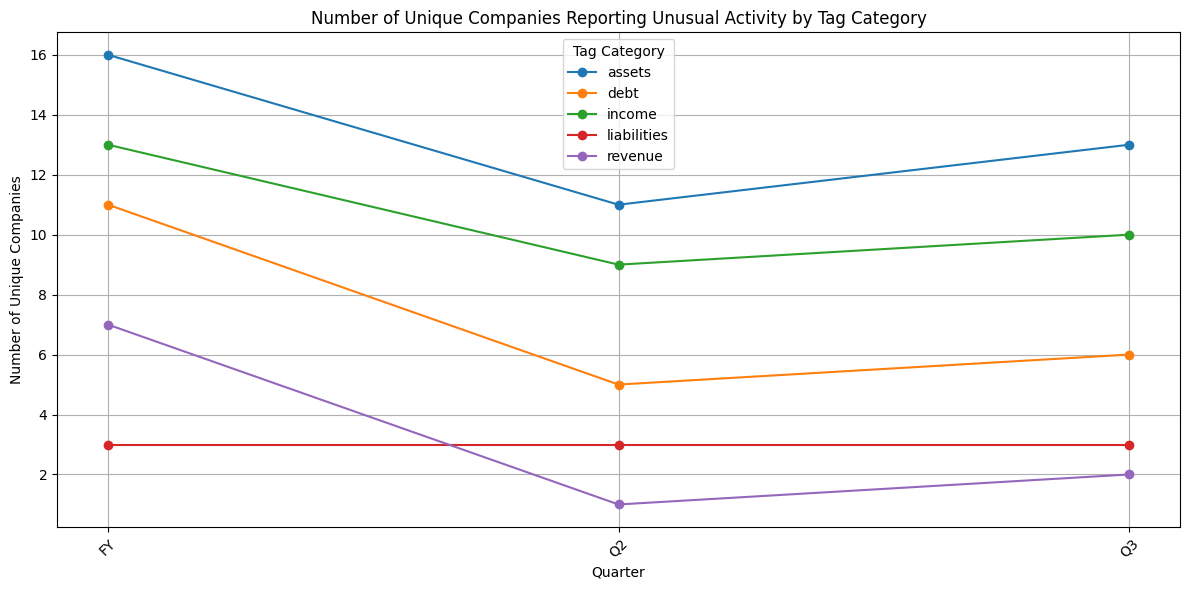

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Step 1: Extract the quarter from the 'current_fp' column correctly
unusual_activity_results = unusual_activity_results.withColumn("quarter", F.expr("substring(current_fp, 1, 2)"))

# Step 2: Count the number of unique companies for each tag category and quarter
quarter_counts = unusual_activity_results.groupBy("quarter", "tag_category").agg(F.countDistinct("cik").alias("number_of_companies"))

# Step 3: Convert the results to a Pandas DataFrame for plotting
quarter_counts_pd = quarter_counts.toPandas()

# Step 4: Pivot the DataFrame to have quarters as the index and tag categories as columns
pivot_df = quarter_counts_pd.pivot(index="quarter", columns="tag_category", values="number_of_companies").fillna(0)

# Step 5: Plotting the number of companies for each tag category over the quarters
plt.figure(figsize=(12, 6))
for tag in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[tag], marker='o', label=tag)

plt.xlabel('Quarter')
plt.ylabel('Number of Unique Companies')
plt.title('Number of Unique Companies Reporting Unusual Activity by Tag Category')
plt.xticks(rotation=45)
plt.legend(title='Tag Category')
plt.grid()
plt.tight_layout()
plt.show()


As we could see for every quarter for income we have more number of companis who show unusual activity. And as we could see there are atleast 20 companies showing unusual activity for each quarter hence need to check upon these.

**Question 4** - Analyze how corporate executives and board members are connected across different companies and perform centrality analysis. Note that this dataset directly does not contain the names of office holders for a company. This data will need to be extracted from other sources such as Form 10-K or any third party data source.

We have done question 4 in a seperate file.

Please refer from https://colab.research.google.com/drive/1lKFsmk1FcEhu9gV-oOeA23yFkoF2kbQr#scrollTo=22OKSLmlEBfQ

**Question 5** - Financial Query and Report Generation via GraphRAG. The user should be able to query specific financial metrics, trends, or insights from the dataset using plain English.

In [ ]:
tags_to_include = ["Assets", "Liabilities", "Revenue", "Profit", "Loss", "CashAndCashEquivalents", "Debt",'Income']
num_data_filtered = num_data.filter(num_data.tag.isin(tags_to_include))

# Merge the submission data with the numeric data on the 'adsh' column
merged_df = num_data_filtered.join(sub_data, on='adsh', how='inner')

# Ensure fiscal year is an integer
merged_df = merged_df.withColumn("fy", merged_df["fy"].cast("int"))

# Remove duplicate entries
merged_df = merged_df.dropDuplicates(['adsh', 'tag', 'value', 'cik', 'fy'])

# Group and summarize financial data by company, tag, and fiscal year
grouped_df = merged_df.groupBy(['adsh', 'name', 'tag', 'fy']).agg(F.sum('value').alias('value')).dropDuplicates(['name', 'tag', 'fy'])

# Remove any rows with missing values
grouped_df = grouped_df.na.drop(subset=['name', 'tag', 'value', 'fy'])



In [ ]:
NEO4J_URI = "neo4j+s://22e0ea28.databases.neo4j.io"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "7L6AUSP97VOZFcl5dEeSIFCwacdVwgttCA5ZPsm3UgQ"
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))


# Step 5: Define Function to Create Company and Metric Nodes in Neo4j
def create_company_and_metric(tx, records):
    query = """
    UNWIND $records AS record
    MERGE (c:Company {name: record.name})
    MERGE (m:Metric {tag: record.tag, fy: record.fy})
    ON CREATE SET m.value = record.value
    ON MATCH SET m.value = record.value
    MERGE (c)-[:HAS_METRIC {fy: record.fy, value: record.value}]->(m)
    """
    tx.run(query, records=records)

# Step 4: Load Data into Neo4j in Batches
def load_to_neo4j(df, batch_size=1000):
    records = df.collect()  # Collecting the data to driver
    total_records = len(records)

    for i in range(0, total_records, batch_size):
        batch = records[i:i + batch_size]
        # Creating a list of dictionaries for Neo4j
        batch_data = [{'name': record['name'], 'tag': record['tag'], 'value': record['value'], 'fy': record['fy']} for record in batch]

        with driver.session() as session:
            session.execute_write(create_company_and_metric, batch_data)
            print(f"Loaded batch {i // batch_size + 1} of size {len(batch)}")

# Load data into Neo4j
load_to_neo4j(grouped_df)
print("Data loaded into Neo4j.")



# Initialize Neo4j Driver
from neo4j import GraphDatabase

driver = GraphDatabase.driver("bolt://your_neo4j_host:7687", auth=("neo4j", "your_password"))

spark.stop()

Loaded batch 1 of size 1000
Loaded batch 2 of size 1000
Loaded batch 3 of size 1000
Loaded batch 4 of size 1000
Loaded batch 5 of size 1000
Loaded batch 6 of size 1000
Loaded batch 7 of size 1000
Loaded batch 8 of size 1000
Loaded batch 9 of size 1000
Loaded batch 10 of size 1000
Loaded batch 11 of size 1000
Loaded batch 12 of size 1000
Loaded batch 13 of size 1000
Loaded batch 14 of size 1000
Loaded batch 15 of size 1000
Loaded batch 16 of size 1000
Loaded batch 17 of size 1000
Loaded batch 18 of size 1000
Loaded batch 19 of size 1000
Loaded batch 20 of size 1000
Loaded batch 21 of size 1000
Loaded batch 22 of size 1000
Loaded batch 23 of size 1000
Loaded batch 24 of size 769
Data loaded into Neo4j.


Step 4: Defining functions for the required analysis and report generation

In [ ]:
from neo4j import GraphDatabase

# Neo4j Connection
NEO4J_URI = "neo4j+s://22e0ea28.databases.neo4j.io"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "7L6AUSP97VOZFcl5dEeSIFCwacdVwgttCA5ZPsm3UgQ"

def query_neo4j(query, params=None):
    driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
    with driver.session() as session:
        result = session.run(query, params)
        data = [record for record in result]
    driver.close()
    return data

In [ ]:
from neo4j import GraphDatabase
import re

# Neo4j Connection
NEO4J_URI = "neo4j+s://22e0ea28.databases.neo4j.io"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "7L6AUSP97VOZFcl5dEeSIFCwacdVwgttCA5ZPsm3UgQ"

def query_neo4j(query, params=None):
    driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
    with driver.session() as session:
        result = session.run(query, params)
        data = [record for record in result]
    driver.close()
    return data

def format_metrics(data):
    if not data:
        return "No data available."

    formatted_data = []
    for record in data:
        formatted_entry = f"Company: {record['company']}, Metric: {record['metric']}, Value: {record['value']}, Year: {record['year']}"
        formatted_data.append(formatted_entry)

    return "\n".join(formatted_data)


def get_company_metrics(company_name):
    query = """
    MATCH (c:Company)-[:HAS_METRIC]->(m:Metric)
    WHERE toLower(c.name) CONTAINS $company_name
    RETURN c.name AS company, m.tag AS metric, m.value AS value, m.fy AS year
    """
    data = query_neo4j(query, {"company_name": company_name.lower()})
    return format_metrics(data)

def get_metrics_over_time(company_name, year):
    query = """
    MATCH (c:Company)-[:HAS_METRIC]->(m:Metric)
    WHERE toLower(c.name) CONTAINS $company_name AND m.fy = $year
    RETURN c.name AS company, m.tag AS metric, m.value AS value, m.fy AS year
    """
    data = query_neo4j(query, {"company_name": company_name.lower(), "year": year})
    return format_metrics(data)

def get_top_companies_by_metric(metric):
    query = """
    MATCH (c:Company)-[:HAS_METRIC]->(m:Metric)
    WHERE m.tag CONTAINS $metric
    RETURN c.name AS company, m.value AS value
    ORDER BY m.value DESC
    LIMIT 5
    """
    data = query_neo4j(query, {"metric": metric})
    formatted_data = [f"Company: {record['company']}, Value: {record['value']}" for record in data]
    return "\n".join(formatted_data)

def generate_summary_report(company_name):
    query = """
    MATCH (c:Company)-[:HAS_METRIC]->(m:Metric)
    WHERE toLower(c.name) CONTAINS $company_name
    RETURN c.name AS company, m.tag AS metric, m.value AS value, m.fy AS year
    """
    data = query_neo4j(query, {"company_name": company_name.lower()})

    if not data:
        return f"No data found for company: {company_name}"

    # Format the report
    report = f"Summary Report for {company_name}:\n"
    report += "---------------------------------\n"
    for record in data:
        report += f"Metric: {record['metric']}, Value: {record['value']}, Year: {record['year']}\n"
    return report


import pandas as pd

def get_top_companies_by_asset(year, limit=10):
    query = """
    MATCH (c:Company)-[:HAS_METRIC]->(m:Metric)
    WHERE m.tag CONTAINS 'Asset' AND m.fy = $year
    RETURN c.name AS company, m.value AS Asset
    ORDER BY m.value DESC
    LIMIT $limit
    """
    data = query_neo4j(query, {"year": year, "limit": limit})

    if not data:
        print(f"No asset data found for year: {year}")
        # Debugging: Check all metrics for the year
        debug_query = """
        MATCH (c:Company)-[:HAS_METRIC]->(m:Metric)
        WHERE m.fy = $year
        RETURN c.name AS company, m.tag AS metric, m.value AS value
        """
        debug_data = query_neo4j(debug_query, {"year": year})
        print("Metrics for year {}:".format(year))
        for record in debug_data:
            print(f"Company: {record['company']}, Metric: {record['metric']}, Value: {record['value']}")
        return f"No asset data found for year: {year}"

    # Create a DataFrame from the data
    df = pd.DataFrame(data)

    return df




def get_asset_to_liability_ratio(company_name):
    query = """
    MATCH (c:Company)-[:HAS_METRIC]->(m1:Metric), (c)-[:HAS_METRIC]->(m2:Metric)
    WHERE toLower(c.name) CONTAINS $company_name AND m1.tag CONTAINS 'Assets' AND m2.tag CONTAINS 'Liabilities'
    RETURN c.name AS company, m1.value AS asset, m2.value AS liability, (m1.value / m2.value) AS ratio
    """
    data = query_neo4j(query, {"company_name": company_name.lower()})

    if not data:
        return f"No data found for company: {company_name}"

    report = f"Asset to Liability Ratio for {company_name}:\n"  # Updated title
    report += "-------------------------------------------\n"
    for record in data:
        report += f"Assets: {record['asset']}, Liabilities: {record['liability']}, Ratio: {record['ratio']:.2f}\n"
    return report





Enter your query: tOP COMPANIES BY ASSET
No asset data found for year: top companies by asset
Metrics for year top companies by asset:
No asset data found for year: top companies by asset


Step 5: Checking the functions

In [ ]:
# Usage example
result_df = get_top_companies_by_asset(2016)
print(result_df)

                                    0             1
0      ADAMS RESOURCES & ENERGY, INC.  4.102249e+09
1          ADVANCED MICRO DEVICES INC  4.102249e+09
2                      ALEXANDERS INC  4.102249e+09
3                           ALICO INC  4.102249e+09
4                 CHENIERE ENERGY INC  4.102249e+09
5              SKYWORKS SOLUTIONS INC  4.102249e+09
6  INDUSTRIAL SERVICES OF AMERICA INC  4.102249e+09
7                         AMERCO /NV/  4.102249e+09
8      AMERICAN ELECTRIC POWER CO INC  4.102249e+09
9        AMERICAN EXPRESS CREDIT CORP  4.102249e+09


In [ ]:
from neo4j import GraphDatabase
NEO4J_URI = "neo4j+s://22e0ea28.databases.neo4j.io"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "7L6AUSP97VOZFcl5dEeSIFCwacdVwgttCA5ZPsm3UgQ"

from neo4j import GraphDatabase

class Neo4jConnector:
    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

    def close(self):
        self.driver.close()

    def get_unique_metric_tags(self, year):
        with self.driver.session() as session:
            result = session.run(
                """
                MATCH (c:Company)-[:HAS_METRIC]->(m:Metric)
                WHERE m.fy = $year AND m.tag CONTAINS 'Asset'
                RETURN c.name AS company, m.value AS asset
                ORDER BY m.value DESC
                LIMIT 10
                """,
                year=year
            )
            # Use correct key names
            tags = [{"company": record["company"], "asset_value": record["asset"]} for record in result]
        return tags

# Usage example
connector = Neo4jConnector("neo4j+s://22e0ea28.databases.neo4j.io", "neo4j", "7L6AUSP97VOZFcl5dEeSIFCwacdVwgttCA5ZPsm3UgQ")

# Call the function with the desired year
unique_tags = connector.get_unique_metric_tags(2016)
print(unique_tags)

# Close the connection
connector.close()


[{'company': 'ADAMS RESOURCES & ENERGY, INC.', 'asset_value': 4102248960.0}, {'company': 'ADVANCED MICRO DEVICES INC', 'asset_value': 4102248960.0}, {'company': 'ALEXANDERS INC', 'asset_value': 4102248960.0}, {'company': 'ALICO INC', 'asset_value': 4102248960.0}, {'company': 'CHENIERE ENERGY INC', 'asset_value': 4102248960.0}, {'company': 'SKYWORKS SOLUTIONS INC', 'asset_value': 4102248960.0}, {'company': 'INDUSTRIAL SERVICES OF AMERICA INC', 'asset_value': 4102248960.0}, {'company': 'AMERCO /NV/', 'asset_value': 4102248960.0}, {'company': 'AMERICAN ELECTRIC POWER CO INC', 'asset_value': 4102248960.0}, {'company': 'AMERICAN EXPRESS CREDIT CORP', 'asset_value': 4102248960.0}]


In [ ]:
get_top_companies_by_metric('Liabilities')

'Company: AUTOMATIC DATA PROCESSING INC, Value: 22203299872.0\nCompany: AVNET INC, Value: 22203299872.0\nCompany: BROWN FORMAN CORP, Value: 22203299872.0\nCompany: BUTLER NATIONAL CORP, Value: 22203299872.0\nCompany: CAL-MAINE FOODS INC, Value: 22203299872.0'

In [ ]:
get_asset_to_liability_ratio('AUTOMATIC DATA PROCESSING INC')

'Asset to Liability Ratio for AUTOMATIC DATA PROCESSING INC:\n-------------------------------------------\nAssets: 4102248960.0, Liabilities: 631442976.0, Ratio: 6.50\nAssets: 50700000.0, Liabilities: 631442976.0, Ratio: 0.08\nAssets: 4102248960.0, Liabilities: 22203299872.0, Ratio: 0.18\nAssets: 50700000.0, Liabilities: 22203299872.0, Ratio: 0.00\n'

Step 5: Created a Graph RAG which could generate reports and analysis

In [ ]:
from neo4j import GraphDatabase
import re

# Neo4j Connection
NEO4J_URI = "neo4j+s://22e0ea28.databases.neo4j.io"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "7L6AUSP97VOZFcl5dEeSIFCwacdVwgttCA5ZPsm3UgQ"

def query_neo4j(query, params=None):
    driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
    with driver.session() as session:
        result = session.run(query, params)
        data = [record for record in result]
    driver.close()
    return data

def format_metrics(data):
    if not data:
        return "No data available."

    formatted_data = []
    for record in data:
        formatted_entry = f"Company: {record['company']}, Metric: {record['metric']}, Value: {record['value']}, Year: {record['year']}"
        formatted_data.append(formatted_entry)

    return "\n".join(formatted_data)

def get_company_metrics(company_name):
    query = """
    MATCH (c:Company)-[:HAS_METRIC]->(m:Metric)
    WHERE toLower(c.name) CONTAINS $company_name
    RETURN c.name AS company, m.tag AS metric, m.value AS value, m.fy AS year
    """
    data = query_neo4j(query, {"company_name": company_name.lower()})
    return format_metrics(data)

def get_metrics_over_time(company_name, year):
    query = """
    MATCH (c:Company)-[:HAS_METRIC]->(m:Metric)
    WHERE toLower(c.name) CONTAINS $company_name AND m.fy = $year
    RETURN c.name AS company, m.tag AS metric, m.value AS value, m.fy AS year
    """
    data = query_neo4j(query, {"company_name": company_name.lower(), "year": year})
    return format_metrics(data)

def get_top_companies_by_metric(metric):
    query = """
    MATCH (c:Company)-[:HAS_METRIC]->(m:Metric)
    WHERE toLower(m.tag) CONTAINS $metric
    RETURN c.name AS company, m.value AS value
    ORDER BY m.value DESC
    LIMIT 5
    """
    data = query_neo4j(query, {"metric": metric.lower()})
    formatted_data = [f"Company: {record['company']}, Value: {record['value']}" for record in data]
    return "\n".join(formatted_data)

def generate_summary_report(company_name):
    query = """
    MATCH (c:Company)-[:HAS_METRIC]->(m:Metric)
    WHERE toLower(c.name) CONTAINS $company_name
    RETURN c.name AS company, m.tag AS metric, m.value AS value, m.fy AS year
    """
    data = query_neo4j(query, {"company_name": company_name.lower()})

    if not data:
        return f"No data found for company: {company_name}"

    # Format the report
    report = f"Summary Report for {company_name}:\n"
    report += "---------------------------------\n"
    for record in data:
        report += f"Metric: {record['metric']}, Value: {record['value']}, Year: {record['year']}\n"
    return report

def get_top_companies_by_asset(year, limit=10):
    query = """
    MATCH (c:Company)-[:HAS_METRIC]->(m:Metric)
    WHERE m.tag CONTAINS 'Asset' AND m.fy = $year
    RETURN c.name AS company, m.value AS Asset
    ORDER BY m.value DESC
    LIMIT $limit
    """
    data = query_neo4j(query, {"year": year, "limit": limit})

    if not data:
        return f"No asset data found for year: {year}"

    # Create a DataFrame from the data
    df = pd.DataFrame(data)

    return df

def get_asset_to_liability_ratio(company_name):
    query = """
    MATCH (c:Company)-[:HAS_METRIC]->(m1:Metric), (c)-[:HAS_METRIC]->(m2:Metric)
    WHERE toLower(c.name) CONTAINS $company_name AND m1.tag CONTAINS 'Assets' AND m2.tag CONTAINS 'Liabilities'
    RETURN c.name AS company, m1.value AS asset, m2.value AS liability, (m1.value / m2.value) AS ratio
    """
    data = query_neo4j(query, {"company_name": company_name.lower()})

    if not data:
        return f"No data found for company: {company_name}"

    report = f"Asset to Liability Ratio for {company_name}:\n"
    report += "-------------------------------------------\n"
    for record in data:
        report += f"Assets: {record['asset']}, Liabilities: {record['liability']}, Ratio: {record['ratio']:.2f}\n"
    return report

def main():
    print("Welcome to the Company Metrics Query System!")
    print("You can ask questions like:")
    print("- 'What are the metrics for [Company Name]?'")
    print("- 'Get metrics for [Company Name] in [Year]?'")
    print("- 'Top companies by [Metric]?'")
    print("- 'Summary report for [Company Name]?'")
    print("- 'Get asset to liability ratio for [Company Name]?'")

    while True:
        question = input("\nEnter your question (or type 'exit' to quit): ").strip().lower()
        if question == 'exit':
            break
        elif "metrics for" in question:
            company_name = question.split("metrics for")[-1].strip().title()
            print(get_company_metrics(company_name))
        elif "get metrics for" in question:
            parts = question.split("get metrics for")[-1].strip().split("in")
            company_name = parts[0].strip().title()
            year = parts[1].strip() if len(parts) > 1 else None
            if year:
                print(get_metrics_over_time(company_name, year))
            else:
                print("Please specify a year.")
        elif "top companies by" in question:
            metric = question.split("top companies by")[-1].strip()
            print(get_top_companies_by_metric(metric))
        elif "summary report for" in question:
            company_name = question.split("summary report for")[-1].strip().title()
            print(generate_summary_report(company_name))
        elif "asset to liability ratio for" in question:
            company_name = question.split("asset to liability ratio for")[-1].strip().title()
            print(get_asset_to_liability_ratio(company_name))
        else:
            print("Sorry, I didn't understand that question. Please try again.")

if __name__ == "__main__":
    main()


Welcome to the Company Metrics Query System!
You can ask questions like:
- 'What are the metrics for [Company Name]?'
- 'Get metrics for [Company Name] in [Year]?'
- 'Top companies by [Metric]?'
- 'Summary report for [Company Name]?'
- 'Get asset to liability ratio for [Company Name]?'

Enter your question (or type 'exit' to quit): Top companies by Assets
Company: ADAMS RESOURCES & ENERGY, INC., Value: 4102248960.0
Company: ADVANCED MICRO DEVICES INC, Value: 4102248960.0
Company: ALEXANDERS INC, Value: 4102248960.0
Company: ALICO INC, Value: 4102248960.0
Company: CHENIERE ENERGY INC, Value: 4102248960.0

Enter your question (or type 'exit' to quit): Top companies by Liabilities
Company: AUTOMATIC DATA PROCESSING INC, Value: 22203299872.0
Company: AVNET INC, Value: 22203299872.0
Company: BROWN FORMAN CORP, Value: 22203299872.0
Company: BUTLER NATIONAL CORP, Value: 22203299872.0
Company: CAL-MAINE FOODS INC, Value: 22203299872.0

Enter your question (or type 'exit' to quit): What are the